<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# df_total 생성

- 구조 : 차종, url, 제조사, 가격, 출시년도, 외형, 리뷰

In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import json
import re

from urllib import parse # url 디코딩 모듈
import numpy as np

In [ ]:
second_df_reviews=pd.read_csv('/content/drive/MyDrive/프로젝트_1/second_comments_DataFrame.csv', index_col=0)
second_df_reviews

,second_car_list,second_url_list,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,['여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"['23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한..."
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,['제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 ...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,['승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,['볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 ...
...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"['레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로..."
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,['아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,['깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,['쓸만한 차\n가성비 좋음\n연비좋음\n. ...


In [ ]:
# 현재 오너평가 링크로 저장되어있어서, 기본 전체링크로 변경해주기위해 '%오너평가' 부분 삭제
second_df_reviews.second_url_list.replace('%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80', '', inplace=True, regex=True) # 문자열 일부만 치환하고 싶은 경우는 regex=True 해주어야 함

In [ ]:
df_add=pd.read_csv('/content/drive/MyDrive/프로젝트_1/add_car_info.csv', index_col=0)
df_add

,제조사,가격,출시년도,외형
0,폭스바겐,"3,232만원",2023,준중형 세단
1,캐딜락,"5,851만원",2023,준중형 SUV
2,아우디,"10,997만원",2023,준대형 세단
3,아우디,"8,116만원",2023,중형 세단
4,아우디,"7,182만원",2023,중형 SUV
...,...,...,...,...
4264,닛산,NaN,1991,경형 컨버터블
4265,현대,NaN,1990,소형 해치백
4266,기아,629만원,1990,소형 세단
4267,현대,649만원,1990,준중형 세단


In [ ]:
second_df_reviews

,second_car_list,second_url_list,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,['여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"['23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한..."
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,['제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 ...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,['승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,['볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 ...
...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"['레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로..."
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,['아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,['깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,['쓸만한 차\n가성비 좋음\n연비좋음\n. ...


In [ ]:
type(second_df_reviews.comments[0])

str

In [ ]:
# comment 가 현재 str형태로, unnest 함수 사용 위해 list로 변환
for i in range(len(second_df_reviews.comments)):
    second_df_reviews.comments[i] = second_df_reviews.comments[i][2:-3].split("', '")  # 맨앞[' 와 맨뒤 '] 제거후 '. '로 split 하면 list로 변경 가능

In [ ]:
# 중첩배열  https://ahnty0122.tistory.com/10 참고 
import numpy as np
import pandas as pd

def unnest(df, tile, explode):
    vals = df[explode].sum(1)
    rs = [len(r) for r in vals]
    a = np.repeat(df[tile].values, rs, axis=0)
    b = np.concatenate(vals.values)
    d = np.column_stack((a, b))
    return pd.DataFrame(d, columns = tile +  ['_'.join(explode)])

In [ ]:
# 우선 2개의 df 합치기
df_total = pd.concat([second_df_reviews, df_add], axis=1)
df_total

,second_car_list,second_url_list,comments,제조사,가격,출시년도,외형
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,[여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체...,폭스바겐,"3,232만원",2023,준중형 세단
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"[23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한 ...",캐딜락,"5,851만원",2023,준중형 SUV
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,[제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 편...,아우디,"10,997만원",2023,준대형 세단
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,[승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만족...,아우디,"8,116만원",2023,중형 세단
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,[볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 타...,아우디,"7,182만원",2023,중형 SUV
...,...,...,...,...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"[레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로망...",닛산,NaN,1991,경형 컨버터블
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,[아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시는...,현대,NaN,1990,소형 해치백
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,[깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해야...,기아,629만원,1990,소형 세단
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,[쓸만한 차\n가성비 좋음\n연비좋음\n. ....,현대,649만원,1990,준중형 세단


In [ ]:
# 램 과부화 방지위해 1000행씩 나눠서 진행
df_total_1 = df_total.loc[:1000]
df_total_2 = df_total.loc[1000:2000]
df_total_3 = df_total.loc[2000:3000]
df_total_4 = df_total.loc[3000:]

In [ ]:
df_total_1 = unnest(df_total_1, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_1

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
354995,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"좋은차입니다.\n연비도, 와관도, 고장없고..!\n차 구입 후 지금까지 한번의 고장없음."
354996,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,디자인 좋고 내구성은 지금까지 만족합니다 실내 디자인이 올드하고 편의장비가 좀 부족해요
354997,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,대중적이지 않습니다. 한국사람들이 선호하는 독일차 브랜드들에서 최고가 모델을 제외한...
354998,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,8년째 타고 있는 차량입니다.디자인 이쁘고 잔고장이 별로 없습니다.지금은 단종된걸로...


In [ ]:
df_total_2 = unnest(df_total_2, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_2

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,차를 구매하기전 꼭 필요한게 무엇인가가 중요합니다.\n가격으로 구매해서 후회한적이 ...
1,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"정숙하고 승차감 대단히 우수하고 만듦새와 실내외 디자인, 편의장치 모두 우수함. 독..."
2,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"역시나 조용하고 잔고장 없고, 7년동안 한번도 잔고장 난적이 없고 딱히 뛰어나지도 ..."
3,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,20대에 사서 바꾸고 싶은데 고장이 안나 제발 좀 바꾸게 적당한 고장 좀 나자..잔...
4,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"6기통 후륜세단., 차량크기도 적당하고 고급스러우며 무엇보다\n흔하지 않아서 좋아요"
...,...,...,...,...,...,...,...
349321,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,패션카로는 1등이 아닌가..\n가성비 최고입니당ㅇㅇㅇㅇㅇㄴㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
349322,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,* 조향시에 또 민첩하게 움직이지만 무언가 헐렁한 그 느낌을 지울 수 없다. 투어러...
349323,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,가성비 좋은 8기통\n고속주행연비는 기대해볼만하나 시내에선 답도없음\n6.5세대부터...
349324,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,"기대이상으로 만족하면서 타고있습니다 승차감,성능 좋구요\n저렴하다고 생각해서 사려고..."


In [ ]:
df_total_3 = unnest(df_total_3, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_3

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,"연비가 나쁘지도 않은거 같애요 생각보다 앞이랑 사이드가 큽니다 조심성이 필요하고,..."
1,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,6세대 5.0 GT 컨버터블 6년간 타보면서 느낌 점 :\n\n 마력대비 가성비는 ...
2,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,감성과 가성비로 타는 스포츠카\n연비주행하면 연비도 나쁘지 않으나 그러기엔 차가 너...
3,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,머슬카 3대장도 역사의 뒤안길로 사라져가고 있습니다. \n쉐보레 카마로의 단종과 닷...
4,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,연비주행을 위한 차는 아니지만 매우 아쉬움\n이 가격에 이 디자인이면 가성비 극강임...
...,...,...,...,...,...,...,...
274757,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,차성능과 스마트카로서의 만족하고있으나\n연비는 최신경쟁차종에비해 현저히 떨어진다.
274758,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,8년간 운행해보니 그래도 안전한 차인건 인정. \n고질적으로 고장나는 부분이 있고 ...
274759,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,고속 주행시 안정감 아주좋고 매우 튼튼해서 안전성도 좋습니다. 그러나 트랜스미션의 ...
274760,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,2012년식 알페온! 10년을 탔지만 만족한다. \n10년전에 다른 차를 샀으면 ...


In [ ]:
df_total_4 = unnest(df_total_4, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_4

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,뷰익 라크로스를 너무 심하게 다운사이징해서 아쉽긴 했지만\n(그랜저급으로 맞추느라고...
1,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,원래는 쌍용차였는데\n음주운전 삼진 아웃되서 차를 매매하고\n추후에 이차를중고로 구...
2,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,전체적으로좋아요 승차감도 좋아요\n전체적으로좋아요 승차감도 좋아요\n전체적으로좋아요...
3,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,전반적으로 만족하지만 연비는 좀 떨어지는 편임\n빼고 잔고장도없고 전반적으로 만족함
4,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,정숙성이우수함이 느껴져서 좋습니다..코너링과 급재동우수한것같습니다..~~
...,...,...,...,...,...,...,...
185813,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
185814,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
185815,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
185816,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [ ]:
df_total = pd.concat([df_total_1, df_total_2, df_total_3, df_total_4], ignore_index=True)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [ ]:
df_total.to_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', encoding='utf-8-sig')

In [ ]:
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


# df total 불러오기

In [12]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import json
import re

from urllib import parse # url 디코딩 모듈
import numpy as np

In [ ]:
df_total=pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', index_col=0)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


# 워크클라우드 연습

- Mecab 사용, 명사 빈도 count
count = Counter(nouns) 

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

#pandas profiling
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=a5d4d674a6fad219684af66cab2c440165468a188b6d168f7acdd133f5424dfd
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 16.8 MB/s 
     |████████████████████████████████| 690 kB 55.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 55.9 MB/s 
     |████████

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = '/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

GangwonEduPower


In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,040 kB]
Hit:14 http://ppa.launchpad.n

In [ ]:
df_total['comments']

0          여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1          저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2          가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3          다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4          시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
                                 ...                        
1164901    처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902    1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903    쓸만한 차\n가성비 좋음\n연비좋음\n.                      .\...
1164904    부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...
1164905        획기적인 외관. 문방구 퀄리티의 인테리어. 뭔가 엉성한대  부품이 없어 고칠수없는
Name: comments, Length: 1164906, dtype: object

In [ ]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

# 명사 리스트 생성
nouns = []
for title in tqdm(df_total['comments']):
  noun = mecab.nouns(title)
  nouns.extend(noun)

print(nouns)

# 명사 빈도 카운트
count = Counter(nouns)

display(count)

  0%|          | 0/1164906 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'여자': 7830,
         '차': 540366,
         '트렁크': 38532,
         '공간': 66584,
         '자석': 10722,
         '차체': 19731,
         '자체': 9828,
         '소리': 21980,
         '편': 70664,
         '저': 20575,
         '차알': 493,
         '못': 488,
         '신랑': 205,
         '연비': 505867,
         '이전': 5379,
         '미니': 19858,
         '변경': 3961,
         '승차감': 114644,
         '가격': 147903,
         '디자인': 305773,
         '기본': 18101,
         '옵션': 67772,
         '부족': 41780,
         '생각': 142729,
         '사이드': 2968,
         '미러': 2910,
         '사각지대': 431,
         '서비스': 20649,
         '센터': 16763,
         '엔진': 67747,
         '노킹': 1105,
         '바퀴': 939,
         '소음': 52138,
         '디스크': 858,
         '문제': 36960,
         '해결': 3381,
         '고장': 141778,
         '일': 18673,
         '년': 142671,
         '만': 62867,
         '번호판': 151,
         '처음': 12147,
         '선글라스': 76,
         '케이스': 351,
         '주행': 255409,
         '중': 72839,
  

# 네이버 자동차 이미지불러와서 워드클라우드


In [ ]:
count

Counter({'여자': 7830,
         '차': 540366,
         '트렁크': 38532,
         '공간': 66584,
         '자석': 10722,
         '차체': 19731,
         '자체': 9828,
         '소리': 21980,
         '편': 70664,
         '저': 20575,
         '차알': 493,
         '못': 488,
         '신랑': 205,
         '연비': 505867,
         '이전': 5379,
         '미니': 19858,
         '변경': 3961,
         '승차감': 114644,
         '가격': 147903,
         '디자인': 305773,
         '기본': 18101,
         '옵션': 67772,
         '부족': 41780,
         '생각': 142729,
         '사이드': 2968,
         '미러': 2910,
         '사각지대': 431,
         '서비스': 20649,
         '센터': 16763,
         '엔진': 67747,
         '노킹': 1105,
         '바퀴': 939,
         '소음': 52138,
         '디스크': 858,
         '문제': 36960,
         '해결': 3381,
         '고장': 141778,
         '일': 18673,
         '년': 142671,
         '만': 62867,
         '번호판': 151,
         '처음': 12147,
         '선글라스': 76,
         '케이스': 351,
         '주행': 255409,
         '중': 72839,
  

In [56]:

from wordcloud import WordCloud, ImageColorGenerator

wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(10,10))
plt.axis("off")
plt.show

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

In [ ]:
import requests
from PIL import Image
# # 마스크 이미지를 url에서 불러오기
url = 'https://search.pstatic.net/common?quality=75&direct=true&src=https%3A%2F%2Fimgauto-phinf.pstatic.net%2F20220518_145%2Fauto_1652857421097Fafz2_PNG%2F20220518160311_tsuBoTb6.png'
resp = requests.get(url)

with open('car_img.png', 'wb') as f:  # 'wb' 바이너리모드로 쓰기
    f.write(resp.content)

mask = np.array(Image.open('car_img.png'))

In [ ]:
# 네이버에서 크롤링해오는 이미지는 rgba 형식으로, rgb로 변환하는 함수 선언
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [ ]:
mask = rgba2rgb(mask)

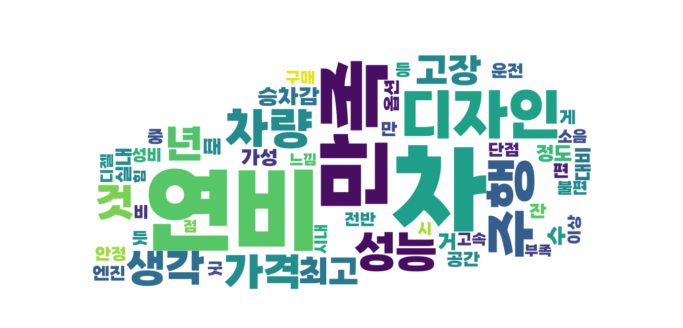

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', 
             mask = mask,
             max_words=50, max_font_size=200).generate_from_frequencies(dict(count))

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# 댓글 n개 이상인경우 img 가져오기

In [ ]:
car_list=pd.read_csv('/content/drive/MyDrive/프로젝트_1/second_comments_DataFrame.csv', index_col=0)
car_list #기존 파일에서 댓글 세는게 좋을까..?

,second_car_list,second_url_list,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,['여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"['23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한..."
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,['제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 ...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,['승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,['볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 ...
...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"['레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로..."
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,['아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,['깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,['쓸만한 차\n가성비 좋음\n연비좋음\n. ...


In [ ]:
len(car_list['comments'][1])

751

In [ ]:
# 이미지는 워드클라우드 용인데 일정량 이상의 댓글은 되야 워드클라드로 만드는 의미가 있음
# 댓글 100이상의 차종의 이미지에 대해서만 가져오기
# 이미지 리스트의 경우 일반이미지, 360도 회전되는 이미지, 색깔별 이미지 들이
# 차들마다 있는 것도 있고 없는 것도 있어서 리스트로 묶어서 저장
for i in range(len(second_car_list)):
    if len(total_comment_list[i]) >= 100:
        img_src_tags=soup_category.select('div.rel_aroundview._image_viewer_wrap div img')
        img_src_list=[]
        for img_src in img_src_tags:
            img_src_list.append(img_src['src']) # 리스트 형태로 묶어서 저장
        img_list.append(img_src_list)
        print(second_car_list[i],'/ 추출된 이미지 수:',len(img_src_list)) # 진행도 확인용
    else:
        img_list.append(['오너평가 100개 미만']) # 100개 미만의 경우 이지미 가져오지 않으나 리스트들의 길이를 맞춰주기 위해
        print(second_car_list[i],"/ 이미지 추출하지 않음")

NameError: ignored

# 그냥 새로 댓글수 세어보기

In [ ]:
oner_url=pd.read_csv('/content/drive/MyDrive/프로젝트_1/second_DataFrame.csv', index_col=0)
oner_url

,second_car_list,second_url_list
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...
...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...


In [ ]:
oner_url['second_url_list'][7]

'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjg1&pkid=128&os=28914311&qvt=0&query=2023%20%EC%95%84%EC%9A%B0%EB%94%94%20A6%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80'

In [ ]:
len(oner_url)

4269

In [ ]:
# 댓글이없을떄 가져오려면 

url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjg1&pkid=128&os=28914311&qvt=0&query=2023%20%EC%95%84%EC%9A%B0%EB%94%94%20A6%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80'
resp=requests.get(url)
soup=BeautifulSoup(resp.content, 'lxml')
re.findall('([0-9]+)명 참여', soup.text)  # 댓글이 없는 경우가 있어서 수정 필요 



['712']

In [ ]:
p_count = []

for i in tqdm(range(len(oner_url))):
    url = oner_url['second_url_list'][i]
    resp=requests.get(url)
    soup=BeautifulSoup(resp.content, 'lxml')
    people = re.findall('([0-9]+)명 참여', soup.text)  
    if people:  # 댓글이 없는 경우가 있어서 있으면 넣어주고 없으면 0 넣어줌
        p_count.append(int(people[0]))
    else:
        p_count.append(0)


  0%|          | 0/4269 [00:00<?, ?it/s]

In [ ]:
p_count = pd.DataFrame(p_count, p_count)
p_count.to_excel('/content/drive/MyDrive/프로젝트_1/people_count.xls')

ValueError: ignored

In [ ]:
p_count.columns = ['review_count']
p_count

,review_count
0,318
1,6
2,7
3,2
4,133
...,...
4264,2
4265,2
4266,29
4267,2


In [ ]:
p_count[p_count['review_count']==0] # 댓글없는것 1개 있음, 2023 아우디 A5 스포트백	

,review_count
8,0


In [ ]:
p_count[p_count['review_count']>= 1000] # 댓글 1000개이상 279개
p_count[p_count['review_count']>= 2000] # 댓글 2000개이상 86개
p_count[p_count['review_count']>= 2500] # 댓글 2500개이상 19개

,review_count
279,3345
280,3345
586,3345
621,3345
687,3302
826,3345
863,3345
1066,3302
1102,3345
1471,2875


In [ ]:
# 중복되는것들.. 연도별로 중복해서 보여주는 정보들이 있음... 어떻게 구현하는게 좋을지? 

oner_url['second_url_list'][279] # 2022 BMW 5시리즈 플러그인 하이브리드
oner_url['second_url_list'][280] # 2022 BMW 5시리즈
oner_url['second_url_list'][586] # 2021 BMW 5시리즈
oner_url['second_url_list'][621] # 2021 BMW 5시리즈 플러그인 하이브리드
oner_url['second_url_list'][826] # 2020 BMW 5시리즈 플러그인 하이브리드
oner_url['second_url_list'][863] # 2020 BMW 5시리즈 
oner_url['second_url_list'][1102] # 2019 BMW 5시리즈
oner_url['second_url_list'][1506] # 2017 BMW 5시리즈

oner_url['second_url_list'][687] # 2020 팰리세이드 오너평가
oner_url['second_url_list'][1066] # 2019 팰리세이드 오너평가

oner_url['second_url_list'][1471] # 2019 아반떼 오너평가
oner_url['second_url_list'][1891] # 2016 아반떼 오너평가

oner_url['second_url_list'][1602] # 2017 쏘렌토 오너평가
oner_url['second_url_list'][1905] # 2016 쏘렌토 오너평가
oner_url['second_url_list'][2195] # 2015 쏘렌토 오너평가

oner_url['second_url_list'][1715] # 2016 그랜저 오너평가
oner_url['second_url_list'][2686] # 2013 그랜저 오너평가
oner_url['second_url_list'][2960] # 2012 그랜저 오너평가
oner_url['second_url_list'][3120] # 2011 그랜저 오너평가

'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjg1&pkid=128&os=2032473&qvt=0&query=2011%20%EA%B7%B8%EB%9E%9C%EC%A0%80%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80'

In [ ]:
oner_url['second_url_list'][280]

'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjg1&pkid=128&os=24893464&qvt=0&query=2022%20BMW%205%EC%8B%9C%EB%A6%AC%EC%A6%88%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80'

In [ ]:
df_total=pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', index_col=0)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [ ]:
df_total[df_total['second_car_list'] == '2023 아우디 A5 스포트백']  # A5 소프트백 오너평가가 없는데 댓글이 왜 있지요 ㅠㅠ 

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
1300,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,이쁘고 좋아오\n20대 여성이 타기 딱 좋은듯!!!!!!!\n디자인 우수함
1301,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,결혼전 30대 마지막 드라이빙차로 최적.\n자동차는 완전 이쁩니다.\n기름은 많이 ...
1302,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,하나 특출난건없지만 전체적으로 무난한차량입니다 부드럽습니다 후회는 안할거 같아요
1303,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,독삼사 운행한 차량 중에 가장 마음에 드는 디자인이네요~\n디젤인데도 소음/진동은 ...
1304,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,"A6 타다 혼자 타기에 좋을 것 같아서 넘어왔는데, 진짜 혼자타기엔 좋습니다. 저는..."
...,...,...,...,...,...,...,...
1400,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,"옵션은 국산차에 못미치는게 사실..\n하지만 아우디라는 이름이 있고, 디자인이 있다..."
1401,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,아우디 TFSI 엔진은 연비 포기하고 타야함. \n가속력 글라이딩 느낌 좋음. \n...
1402,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,뒷자리가 좁고 주행성능은 매우 만족합니다.\n전자식 댐퍼가 너무 좋아요.
1403,2023 아우디 A5 스포트백,https://search.naver.com/search.naver?where=ne...,아우디,"5,915만원",2023,중형 쿠페,좋다 잘가고 잘서고 이쁘다 도심에서 연비는 별로지만 고속도로 크루징시에는 13이상은...


# 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from IPython.display import display

import pandas as pd
import numpy as np
# import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [4]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (100 kB/s)
Reading package lis

In [5]:
df_total=pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', index_col=0)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [7]:
comment = df_total['comments']

In [ ]:
comment_set = set([])
for comment in df_total["comments"]:
    comment_set.add(comment)
len(comment_set)

In [9]:
comment_set = list(comment_set)

In [19]:
len(comment_set)

236027

In [ ]:
comment

In [14]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

all_pos =[]
for i in tqdm(range(0,len(comment_set))):
    comment=re.sub("[^가-힣a-zA-Z\s]",'',comment_set[i])
    comment_pos = mecab.pos(comment)
    all_pos.extend(comment_pos)

  0%|          | 0/236027 [00:00<?, ?it/s]

In [21]:
len(all_pos)

7717559

In [22]:
count = Counter(all_pos)

display(count)

Counter({('매우', 'MAG'): 13303,
         ('만족', 'NNG'): 67573,
         ('하', 'XSV'): 77030,
         ('고', 'EC'): 225057,
         ('역시', 'MAJ'): 3110,
         ('소렌토', 'NNP'): 199,
         ('란', 'JX'): 65,
         ('말', 'NNG'): 5657,
         ('이', 'JKS'): 141864,
         ('절로', 'MAG'): 36,
         ('나오', 'VV'): 11243,
         ('네요', 'EC'): 16387,
         ('전기차', 'NNP'): 2564,
         ('대중', 'NNG'): 283,
         ('화', 'XSN'): 1331,
         ('될', 'XSV+ETM'): 555,
         ('때', 'NNG'): 17457,
         ('까지', 'JX'): 12677,
         ('열심히', 'MAG'): 202,
         ('타', 'VV'): 59287,
         ('게요', 'EC'): 18,
         ('년', 'NNG'): 10347,
         ('도', 'JX'): 128831,
         ('에', 'JKB'): 100446,
         ('나온', 'VV+ETM'): 1470,
         ('현기', 'NNG'): 1549,
         ('차', 'NNG'): 100015,
         ('보다', 'JKB'): 21191,
         ('는', 'JX'): 108993,
         ('확실히', 'MAG'): 2414,
         ('주행', 'NNG'): 50857,
         ('성능', 'NNG'): 33987,
         ('이나', 'JC'): 9898,
         

In [23]:
with open('/content/drive/MyDrive/프로젝트_1/한국어 불용어사전.txt','rt') as f:
    stop_words = f.read()

len(stop_words)

2555

In [24]:
with open('/content/drive/MyDrive/프로젝트_1/한국어 불용어사전.txt','rt') as f:
    stop_words = f.read()

len(stop_words)

pass_pos = []
for pos in tqdm(all_pos):
    if pos[0] not in stop_words:
        pass_pos.append(pos)
len(pass_pos)

  0%|          | 0/7717559 [00:00<?, ?it/s]

3633488

In [25]:
count = Counter(pass_pos)

display(count)

Counter({('매우', 'MAG'): 13303,
         ('만족', 'NNG'): 67573,
         ('역시', 'MAJ'): 3110,
         ('소렌토', 'NNP'): 199,
         ('란', 'JX'): 65,
         ('절로', 'MAG'): 36,
         ('나오', 'VV'): 11243,
         ('네요', 'EC'): 16387,
         ('전기차', 'NNP'): 2564,
         ('대중', 'NNG'): 283,
         ('화', 'XSN'): 1331,
         ('열심히', 'MAG'): 202,
         ('게요', 'EC'): 18,
         ('나온', 'VV+ETM'): 1470,
         ('현기', 'NNG'): 1549,
         ('확실히', 'MAG'): 2414,
         ('주행', 'NNG'): 50857,
         ('성능', 'NNG'): 33987,
         ('이나', 'JC'): 9898,
         ('핸들링', 'NNG'): 1112,
         ('뛰어남', 'VA+ETN'): 449,
         ('이후', 'NNG'): 1003,
         ('변했', 'VV+EP'): 16,
         ('는지', 'EC'): 1357,
         ('모르', 'VV'): 2814,
         ('지금', 'MAG'): 3169,
         ('까진', 'JX+JX'): 527,
         ('탄', 'VV+ETM'): 615,
         ('차량', 'NNG'): 36669,
         ('속주', 'NNG'): 1275,
         ('행시', 'NNG'): 5376,
         ('안정', 'NNG'): 9599,
         ('감', 'XSN'): 11199,
        

In [27]:
len(count)

46696

In [28]:
count

Counter({('매우', 'MAG'): 13303,
         ('만족', 'NNG'): 67573,
         ('역시', 'MAJ'): 3110,
         ('소렌토', 'NNP'): 199,
         ('란', 'JX'): 65,
         ('절로', 'MAG'): 36,
         ('나오', 'VV'): 11243,
         ('네요', 'EC'): 16387,
         ('전기차', 'NNP'): 2564,
         ('대중', 'NNG'): 283,
         ('화', 'XSN'): 1331,
         ('열심히', 'MAG'): 202,
         ('게요', 'EC'): 18,
         ('나온', 'VV+ETM'): 1470,
         ('현기', 'NNG'): 1549,
         ('확실히', 'MAG'): 2414,
         ('주행', 'NNG'): 50857,
         ('성능', 'NNG'): 33987,
         ('이나', 'JC'): 9898,
         ('핸들링', 'NNG'): 1112,
         ('뛰어남', 'VA+ETN'): 449,
         ('이후', 'NNG'): 1003,
         ('변했', 'VV+EP'): 16,
         ('는지', 'EC'): 1357,
         ('모르', 'VV'): 2814,
         ('지금', 'MAG'): 3169,
         ('까진', 'JX+JX'): 527,
         ('탄', 'VV+ETM'): 615,
         ('차량', 'NNG'): 36669,
         ('속주', 'NNG'): 1275,
         ('행시', 'NNG'): 5376,
         ('안정', 'NNG'): 9599,
         ('감', 'XSN'): 11199,
        

In [29]:
sort_count = sorted(count.items(), key = lambda x: x[1], reverse=True)
sort_count

[(('n', 'SL'), 200393),
 (('연비', 'NNG'), 105583),
 (('만족', 'NNG'), 67573),
 (('디자인', 'NNG'), 61192),
 (('주행', 'NNG'), 50857),
 (('잘', 'MAG'), 48116),
 (('차량', 'NNG'), 36669),
 (('성능', 'NNG'), 33987),
 (('가격', 'NNG'), 32198),
 (('아요', 'EF'), 31318),
 (('입니다', 'VCP+EF'), 31136),
 (('고장', 'NNG'), 28668),
 (('성', 'XSN'), 28459),
 (('최고', 'NNG'), 23774),
 (('승차감', 'NNG'), 21914),
 (('너무', 'MAG'), 21573),
 (('가성', 'NNG'), 21111),
 (('합니다', 'XSV+EF'), 18981),
 (('괜찮', 'VA'), 18876),
 (('대비', 'NNG'), 17852),
 (('실내', 'NNG'), 17750),
 (('아주', 'MAG'), 17056),
 (('입니다', 'VCP+EC'), 16615),
 (('네요', 'EC'), 16387),
 (('많이', 'MAG'), 15405),
 (('아요', 'EC'), 15149),
 (('잔', 'NNG'), 15055),
 (('공간', 'NNG'), 14503),
 (('엔진', 'NNG'), 14022),
 (('넓', 'VA'), 13563),
 (('옵션', 'NNG'), 13338),
 (('매우', 'MAG'), 13303),
 (('운전', 'NNG'), 13225),
 (('네요', 'EF'), 13168),
 (('합니다', 'XSV+EC'), 13112),
 (('성비', 'NNG'), 12425),
 (('전반', 'NNG'), 12282),
 (('합니다', 'XSA+EF'), 11961),
 (('정말', 'MAG'), 11583),
 (('nn', 'SL'

In [32]:
import pandas as pd

df_sort = pd.DataFrame(sort_count, columns = ['단어', '개수'])
df_sort

,단어,개수
0,"(n, SL)",200393
1,"(연비, NNG)",105583
2,"(만족, NNG)",67573
3,"(디자인, NNG)",61192
4,"(주행, NNG)",50857
...,...,...
46691,"(VXD, SL)",1
46692,"(쏨, NNG)",1
46693,"(SSPS, SL)",1
46694,"(셈브리, NNP)",1


In [36]:
단어, 품사 = [],[]

for i in tqdm(range(len(df_sort))):
    a, b = df_sort['단어'][i]
    단어.append(a)
    품사.append(b)


  0%|          | 0/46696 [00:00<?, ?it/s]

In [38]:
len(단어), len(품사)

(46696, 46696)

In [39]:
df_sort['단어'] = 단어
df_sort['품사'] = 품사 

In [40]:
df_sort

,단어,개수,품사
0,n,200393,SL
1,연비,105583,NNG
2,만족,67573,NNG
3,디자인,61192,NNG
4,주행,50857,NNG
...,...,...,...
46691,VXD,1,SL
46692,쏨,1,NNG
46693,SSPS,1,SL
46694,셈브리,1,NNP


In [41]:
df_sort = df_sort[['단어','품사','개수']]

In [42]:
df_sort

,단어,품사,개수
0,n,SL,200393
1,연비,NNG,105583
2,만족,NNG,67573
3,디자인,NNG,61192
4,주행,NNG,50857
...,...,...,...
46691,VXD,SL,1
46692,쏨,NNG,1
46693,SSPS,SL,1
46694,셈브리,NNP,1


In [78]:
df_sort.to_csv('/content/drive/MyDrive/프로젝트_1/df_sort.csv')

TypeError: ignored

In [80]:
df_sort = pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_sort.csv', index_col=0)

In [81]:
df_sort

,단어,품사,개수
0,n,SL,200393
1,연비,NNG,105583
2,만족,NNG,67573
3,디자인,NNG,61192
4,주행,NNG,50857
...,...,...,...
46691,VXD,SL,1
46692,쏨,NNG,1
46693,SSPS,SL,1
46694,셈브리,NNP,1


In [86]:
mask = df_sort['품사'].isin(['UNKNOWN'])

In [87]:
df_sort_1= df_sort[~mask]

In [88]:
df_sort_1= df_sort_1.reset_index(drop=True)
df_sort_1

,단어,품사,개수
0,n,SL,200393
1,연비,NNG,105583
2,만족,NNG,67573
3,디자인,NNG,61192
4,주행,NNG,50857
...,...,...,...
42218,nXSE,SL,1
42219,VXD,SL,1
42220,쏨,NNG,1
42221,SSPS,SL,1


In [105]:
words = list(df_sort_1['단어'])
numbers = list(df_sort_1['개수'])
count = zip(words, numbers)  

In [57]:
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show

ValueError: ignored

# 리뷰가 가장많은 2016 그랜저로 워드클라우드 생성


In [ ]:
# import requests
# from bs4 import BeautifulSoup
# from tqdm.notebook import tqdm
# import pandas as pd

# from urllib import parse # url 디코딩 모듈
# import numpy as np

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import requests
from bs4 import BeautifulSoup
import json
import re

from IPython.display import display

import pandas as pd
import numpy as np
# import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [8]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.1 MB/s 
     |████████████████████████████████| 465 kB 70.4 MB/s 


In [4]:
df_total=pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', index_col=0)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [5]:
grandeur_16 = df_total['second_car_list'].isin(['2016 그랜저'])

In [6]:
comment_gd = list(df_total[grandeur_16]['comments']) # 2016그랜저 리뷰 : 3913개

In [9]:
from konlpy.tag import Okt
from collections import Counter
import os
from datetime import datetime

# Okt 객체 생성
okt = Okt()

all_pos =[]
for i in tqdm(comment_gd):
    comment = re.sub("[^가-힣a-zA-Z\s]",'',i)
    comment = re.sub('[\n]'," ",comment) # 줄바꿈 -> 띄워쓰기
    comment_morphs = okt.morphs(comment)
    all_pos.extend(comment_morphs)

  0%|          | 0/3913 [00:00<?, ?it/s]

In [11]:
len(all_pos)

86385

In [10]:
# 1글자짜리 제거 
result = [text for text in all_pos if len(text) > 1]
result

['대형',
 '세단',
 '정석',
 '입니다',
 '정숙',
 '하고',
 '편안하고',
 '고급',
 '까지',
 '모든',
 '두루',
 '두루',
 '갖춘',
 '좋은',
 '아주',
 '변안',
 '하고',
 '그냥',
 '하고',
 '아주',
 '아주',
 '무난',
 '하게',
 '탈수',
 '있는',
 '현대차',
 '랜다',
 '승차',
 '감도',
 '좋고',
 '연비',
 '좋아요',
 '차량',
 '고장',
 '별로',
 '없어서',
 '전체',
 '으로',
 '만족합니다',
 '전반',
 '으로',
 '안정',
 '주행',
 '성능',
 '잔고',
 '장도',
 '별로',
 '없어',
 '비교',
 '만족하고',
 '있다',
 '좋습니다',
 '보이지',
 '않고',
 '잔고',
 '없고요',
 '승치',
 '감도',
 '좋죠',
 '추천',
 '드리고',
 '자사',
 '최근',
 '모델',
 '해서도',
 '좀더',
 '중후',
 '있어',
 '보입니다',
 '개인',
 '평가',
 '였습니다',
 'Lpg',
 '차량',
 '화면',
 '연비',
 '표시',
 '되지',
 '않쿠',
 '연비',
 '안좋쿠',
 '그렇죠',
 '잘나가고',
 '조용해요',
 '연비',
 '인데',
 '생각',
 '보다',
 '먹는거',
 '같기',
 '도하',
 '실내',
 '소리',
 '있어요',
 '저렴한',
 '가격',
 '정숙',
 '좋은',
 '타서',
 '좋긴',
 '하지만',
 'nLPG',
 '연비',
 '다소',
 '아쉬움',
 '서스펜션',
 '관리',
 '잘해야',
 '할거',
 '같음',
 '나름',
 '가성',
 '좋은',
 '차입니다',
 '비만',
 '개선',
 '되고',
 '잔고',
 '장만',
 '없으면',
 '최상',
 '차라',
 '생각',
 '합니다',
 '많은',
 '주행',
 '거리',
 '비해',
 '엔진',
 '상태',
 '좋아요',
 '가격',
 '많이',
 '편이',
 '부담',
 '없이',
 '타고있

In [13]:
len(result)

58051

In [11]:
with open('/content/drive/MyDrive/프로젝트_1/한국어 불용어사전.txt','rt') as f:
    stop_words = f.read()

result = [token for token in result if not token in stop_words]
result

['대형',
 '세단',
 '정석',
 '입니다',
 '정숙',
 '편안하고',
 '고급',
 '모든',
 '두루',
 '두루',
 '갖춘',
 '좋은',
 '아주',
 '변안',
 '그냥',
 '아주',
 '아주',
 '무난',
 '탈수',
 '있는',
 '현대차',
 '랜다',
 '승차',
 '감도',
 '좋고',
 '연비',
 '좋아요',
 '차량',
 '고장',
 '별로',
 '없어서',
 '전체',
 '만족합니다',
 '전반',
 '안정',
 '주행',
 '성능',
 '잔고',
 '장도',
 '별로',
 '없어',
 '만족하고',
 '좋습니다',
 '보이지',
 '잔고',
 '없고요',
 '승치',
 '감도',
 '좋죠',
 '추천',
 '드리고',
 '자사',
 '최근',
 '모델',
 '해서도',
 '좀더',
 '중후',
 '보입니다',
 '개인',
 '평가',
 '였습니다',
 'Lpg',
 '차량',
 '화면',
 '연비',
 '표시',
 '되지',
 '않쿠',
 '연비',
 '안좋쿠',
 '그렇죠',
 '잘나가고',
 '조용해요',
 '연비',
 '인데',
 '먹는거',
 '같기',
 '도하',
 '실내',
 '소리',
 '있어요',
 '저렴한',
 '가격',
 '정숙',
 '좋은',
 '타서',
 '좋긴',
 'nLPG',
 '연비',
 '아쉬움',
 '서스펜션',
 '관리',
 '잘해야',
 '할거',
 '같음',
 '나름',
 '가성',
 '좋은',
 '차입니다',
 '비만',
 '개선',
 '되고',
 '잔고',
 '장만',
 '없으면',
 '최상',
 '합니다',
 '주행',
 '비해',
 '엔진',
 '상태',
 '좋아요',
 '가격',
 '많이',
 '부담',
 '타고있어요',
 '들어가서',
 '좋음',
 '라고',
 '가성',
 '비도',
 '괜찮음',
 '디자인',
 '아직도',
 '거슬리지도',
 '좋음',
 '가성',
 '비는',
 '괜찮아요',
 '연비',
 '많이',
 '떨어져요',
 '특히',
 '시내',
 '주행'

In [15]:
len(result)

49719

In [12]:
count = Counter(result)

display(count)

Counter({'대형': 73,
         '세단': 132,
         '정석': 2,
         '입니다': 545,
         '정숙': 111,
         '편안하고': 56,
         '고급': 42,
         '모든': 102,
         '두루': 13,
         '갖춘': 12,
         '좋은': 441,
         '아주': 263,
         '변안': 1,
         '그냥': 90,
         '무난': 258,
         '탈수': 52,
         '있는': 113,
         '현대차': 58,
         '랜다': 2,
         '승차': 155,
         '감도': 108,
         '좋고': 448,
         '연비': 1754,
         '좋아요': 495,
         '차량': 603,
         '고장': 185,
         '별로': 130,
         '없어서': 21,
         '전체': 137,
         '만족합니다': 413,
         '전반': 308,
         '안정': 55,
         '주행': 708,
         '성능': 565,
         '잔고': 356,
         '장도': 60,
         '없어': 37,
         '만족하고': 96,
         '좋습니다': 381,
         '보이지': 5,
         '없고요': 2,
         '승치': 1,
         '좋죠': 2,
         '추천': 92,
         '드리고': 1,
         '자사': 1,
         '최근': 21,
         '모델': 128,
         '해서도': 2,
         '좀더': 15,
         '중후': 41,

In [17]:
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<function matplotlib.pyplot.show(*args, **kw)>

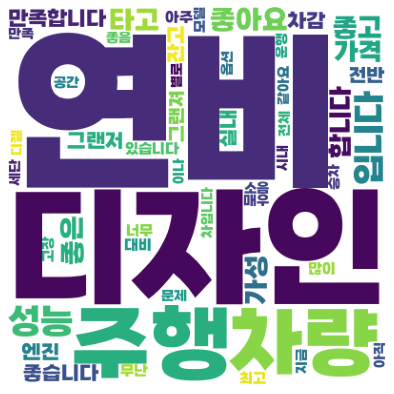

In [18]:
wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show

In [45]:
type(comment_gd)

list

In [13]:
# 명사 제외
def preprocessing(review): 
    okt = Okt()
    
    f = open('/content/drive/MyDrive/프로젝트_1/한국어 불용어사전.txt')
    stop_words = f.read().split()
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 토큰화 + 품사 태깅
    word_review = okt.pos(review_text, stem=True)
    
    # 노이즈 & 불용어 제거
    word_review = [(token, pos) for token, pos in word_review if not token in stop_words and len(token) > 1]
    
    # 명사, 동사, 형용사 추출
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective']]

    return word_review

In [16]:
word_gd = []

for x in tqdm(comment_gd):
    review = preprocessing(x)
    word_gd.extend(review)

  0%|          | 0/3913 [00:00<?, ?it/s]

In [95]:
word_gd

['대형',
 '세단',
 '정석',
 '이다',
 '정숙',
 '편안하다',
 '고급',
 '두루',
 '두루',
 '갖추다',
 '좋다',
 '아주',
 '변안',
 '그냥',
 '아주',
 '아주',
 '무난',
 '탈수',
 '현대차',
 '랜다',
 '지다',
 '승차',
 '감다',
 '좋다',
 '연비',
 '좋다',
 '차량',
 '고장',
 '별로',
 '전체',
 '만족하다',
 '전반',
 '안정',
 '주행',
 '성능',
 '잔고',
 '장도',
 '별로',
 '비교',
 '만족하다',
 '좋다',
 '보이다',
 '잔고',
 '자다',
 '승치',
 '감다',
 '좋다',
 '추천',
 '드리다',
 '자사',
 '최근',
 '모델',
 '좀더',
 '중후',
 '보이다',
 '개인',
 '평가',
 '이다',
 '차량',
 '화면',
 '연비',
 '표시',
 '않쿠',
 '연비',
 '안좋쿠',
 '그렇다',
 '잘나가다',
 '조용하다',
 '연비',
 '생각',
 '먹다',
 '도하',
 '실내',
 '소리',
 '저렴하다',
 '가격',
 '정숙',
 '밉다',
 '좋다',
 '좋다',
 '연비',
 '아쉬움',
 '서스펜션',
 '관리',
 '잘해야',
 '나름',
 '가성',
 '좋다',
 '차이다',
 '비만',
 '개선',
 '잔고',
 '장만',
 '최상',
 '차라',
 '생각',
 '많다',
 '주행',
 '거리',
 '비다',
 '엔진',
 '상태',
 '좋다',
 '가격',
 '싸다',
 '부담',
 '들어가다',
 '좋다',
 '가성',
 '비도',
 '괜찮다',
 '디자인',
 '거슬리다',
 '좋다',
 '가성',
 '비다',
 '괜찮다',
 '연비',
 '떨어지다',
 '시내',
 '주행',
 '연비',
 '상대',
 '디자인',
 '굿승',
 '차감',
 '연비',
 '옵션',
 '핸드',
 '링굿',
 '조아영',
 '굿굿굿',
 '로롤루',
 '택부',
 '걱정',
 '소음',
 '주행',
 '깔끔

In [17]:
count = Counter(word_gd)

<function matplotlib.pyplot.show(*args, **kw)>

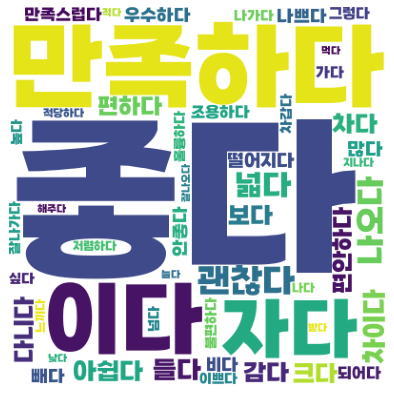

In [53]:
wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show

In [57]:
# 한 문장으로 join 해놓은 전처리 완료된 문장들을 공백 기준으로 분리하는 함수입니다. 

def my_tokenizer(text):
  return text.split()

In [91]:
len(word_gd)

44807

In [14]:
def bigram_tokenizer(text):
    return [' '.join(text[i:i+2]) for i in range(len(text)-1)]

In [18]:
word_bi = bigram_tokenizer(word_gd)

In [19]:
count = Counter(word_bi)

<function matplotlib.pyplot.show(*args, **kw)>

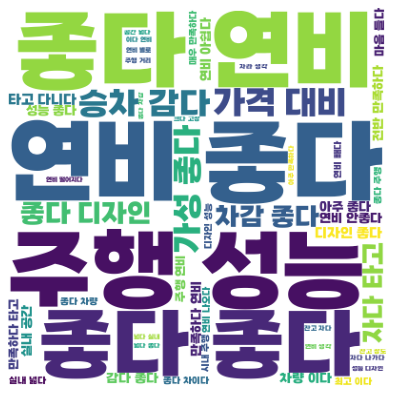

In [83]:
wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show

In [84]:
import requests
from PIL import Image
# # 마스크 이미지를 url에서 불러오기
url = 'https://search.pstatic.net/common?quality=75&direct=true&src=https%3A%2F%2Fimgauto-phinf.pstatic.net%2F20190829_219%2Fauto_1567042351547iLE90_PNG%2F20190829103229_CtM0H8j5.png'
resp = requests.get(url)

with open('car_img.png', 'wb') as f:  # 'wb' 바이너리모드로 쓰기
    f.write(resp.content)

mask = np.array(Image.open('car_img.png'))

In [85]:
# 네이버에서 크롤링해오는 이미지는 rgba 형식으로, rgb로 변환하는 함수 선언
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [86]:
mask = rgba2rgb(mask)

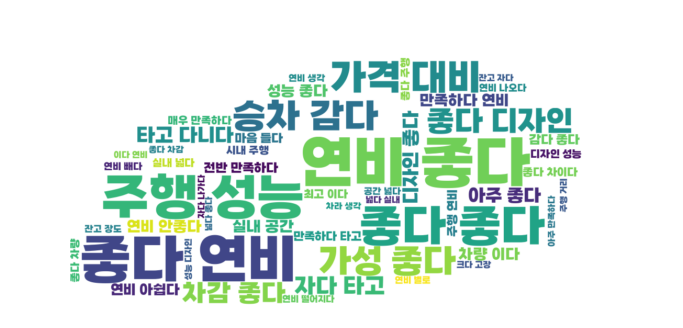

In [87]:
wc = WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', 
             mask = mask,
             max_words=50, max_font_size=200).generate_from_frequencies(dict(count))

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# LDA 시각화

In [1]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5cf20928a258e9a67dfcd93f9e8a7330874d3212d49c78deaed0795c53ceb114
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d8fd61265da0cb0d55ee5e9acbbf20e771cfd1bc642a538f3335b13931371963
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,618 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [20]:
grandeur_16 = df_total['second_car_list'].isin(['2016 그랜저'])
comment_gd = list(df_total[grandeur_16]['comments']) # 2016그랜저 리뷰 : 3913개
comment_gd

['준대형세단의 정석입니다. 정숙하고 편안하고 고급짐까지 모든점을 두루두루 잘갖춘 좋은차!',
 '아주 변안하고 그냥 탈만하고. 아주 아주\\n무난하게 탈수. 있는 현대차 그랜다이져',
 '승차감도 좋고, 연비도 좋아요.\\n차량 잔 고장 별로없어서 전체적으로 만족합니다.',
 '전반적으로 안정적인 주행 성능과  잔고장도 별로  없어 비교적 만족하고 있다.',
 '차 좋습니다 싸보이지 않고 잔고장 잘 없고요 승치감도 좋죠 추천드리고 자사 최근 모델에 비해서도 좀더 중후함이 있어 보입니다 개인적인 평가였습니다^^',
 'Lpg차량이 화면에  연비가 표시  되지 않쿠  연비도 안좋쿠요 그렇죠',
 '차잘나가고조용해요\\n연비야3300씨씨인데생각보다\\n덜먹는거같기도하고\\n실내잡소리는있어요',
 '저렴한가격에 정숙미좋은차를타서좋긴하지만\\nLPG연비가 다소아쉬움\\n서스펜션관리를잘해야할거같음',
 '나름 가성비좋은 차입니다.연비만 개선되고 잔고장만 없으면 최상의 차라고 생각합니다',
 '많은 주행거리에 비해 엔진상태가 좋아요 가격도 많이 싼편이라 부담없이 잘타고있어요',
 '돈안들어가서 좋음 그라고 가성비도 괜찮음\\n디자인도 아직도 거슬리지도 않고 좋음',
 '가성비는 괜찮아요... 연비는 많이 떨어져요.\\n특히 시내주행 연비가  상대적으로',
 '디자인굿\\n승차감굿\\n연비굿\\n옵션굿\\n핸드링굿\\n다조아영\\n굿굿굿이에요\\n호로로로롤루',
 '택부라 많이 걱정했는데 소음도없고 주행도 깔끔하고 연비도 좋아요 만족합니다',
 '주행 성능은 좋습니다.\\n실내 편의성도 좋고\\n실내 취침시 의자가 불편 합니다.\\n집에서 꼭 자야할듯',
 '주행성능 괜찮고 가격 괜찮고 품질 괜찮고 디자인은 그럭저럭 연비는 별로에요',
 'Goobm and I are you going out to the beach tonight',
 '디자인이 마음에 들어서 구입결정함\\n시간이 지나도 별로 질리지 않고 성능도 제법 마음에 들어요',
 '불후의 명작이라고 해도 손색없는 명

In [21]:
# 한글, 영어, 숫자(소수와 퍼센트) 만 남기고 기타 특수문자들을 제거합니다. 
import re

def text_cleaning(doc):
  text = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string = doc)
  return text

In [100]:
# for i in tqdm(range(len(comment_gd))):
#     review = text_cleaning(comment_gd[i])
#     word_gd.extend(review)


TypeError: ignored

In [22]:
len(word_bi)

44806

In [23]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() # split() 뿐
tfidf = tfidf_vect.fit_transform(raw_documents = word_bi) # 기사 개수는 1000개로 조절하겠습니다

tfidf

<44806x4009 sparse matrix of type '<class 'numpy.float64'>'
	with 89128 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 4,  # 연비, 가격(가성비), 디자인
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [25]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[2.00845295e-01 2.00112061e-01 2.00831638e-01 ... 2.00421509e-01
  2.00108127e-01 2.00068193e-01]
 [2.00649270e-01 2.00106818e-01 2.01141255e-01 ... 2.00416367e-01
  2.31499870e+00 2.00064592e-01]
 [2.00199814e-01 9.90029217e-01 2.01086472e-01 ... 2.00771942e-01
  2.15897615e+00 2.32636604e+00]
 [2.00425849e-01 2.00111967e-01 2.00845024e-01 ... 2.00793948e-01
  2.00108663e-01 2.00068478e-01]
 [9.53890507e+00 9.49230133e-01 5.41318199e+02 ... 2.09568461e+01
  2.01732736e-01 2.00068269e-01]]
shape: (5, 4009)


In [26]:
sample = list(range(10))
print(sample[:])
# print(sample[:-4:-1])

n = 1
print(sample[:-n-1:-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9]


In [31]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=7):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('연비', 1839.42), ('좋다', 1521.99), ('디자인', 1258.87), ('가성', 564.68), ('엔진', 436.61), ('최고', 341.44), ('공간', 265.69)]
Topic 2: [('주행', 850.47), ('이다', 753.67), ('성능', 752.43), ('차량', 731.77), ('좋다', 545.04), ('가격', 541.36), ('자다', 508.89)]
Topic 3: [('만족하다', 1006.9), ('차감', 492.7), ('좋다', 468.82), ('넓다', 380.81), ('정도', 346.72), ('차이다', 298.57), ('감다', 240.92)]
Topic 4: [('생각', 548.93), ('괜찮다', 502.2), ('타고', 486.8), ('전반', 421.0), ('실내', 415.82), ('그랜저', 408.91), ('그랜져', 353.55)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [28]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



In [116]:
df_gd = pd.DataFrame(comment_gd)

In [117]:
df_gd.to_csv('/content/drive/MyDrive/프로젝트_1/comment_gd.csv', encoding='utf-8-sig')